In [32]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [33]:
# import data set
bike = pd.read_csv('day.csv')

# Data Preparation On Test Set

In [34]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
bike.shape

(730, 16)

In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [37]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [38]:
bike.isnull().sum()*100/bike.shape[0]


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

observation : No missing values in the dataset

In [39]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
#Mapping variables season, month, weathersit, weekday

bike["season"]=bike.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [41]:
bike["weekday"]=bike.weekday.map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,1,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [42]:
bike["weathersit"]=bike.weathersit.map({1: "Clear", 2:"Mist + Cloudy", 3:"Light Snow", 4:"Snow + Fog"})
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,1,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [43]:
bike["month"]=bike.month.map({1: "Jan", 2:"Feb", 3:"Mar", 4:"April", 5:"May", 6:"June", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
Month = bike.month.unique()
print(Month)

['Jan' 'Feb' 'Mar' 'April' 'May' 'June' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov'
 'Dec']


# Exploratory data analysis

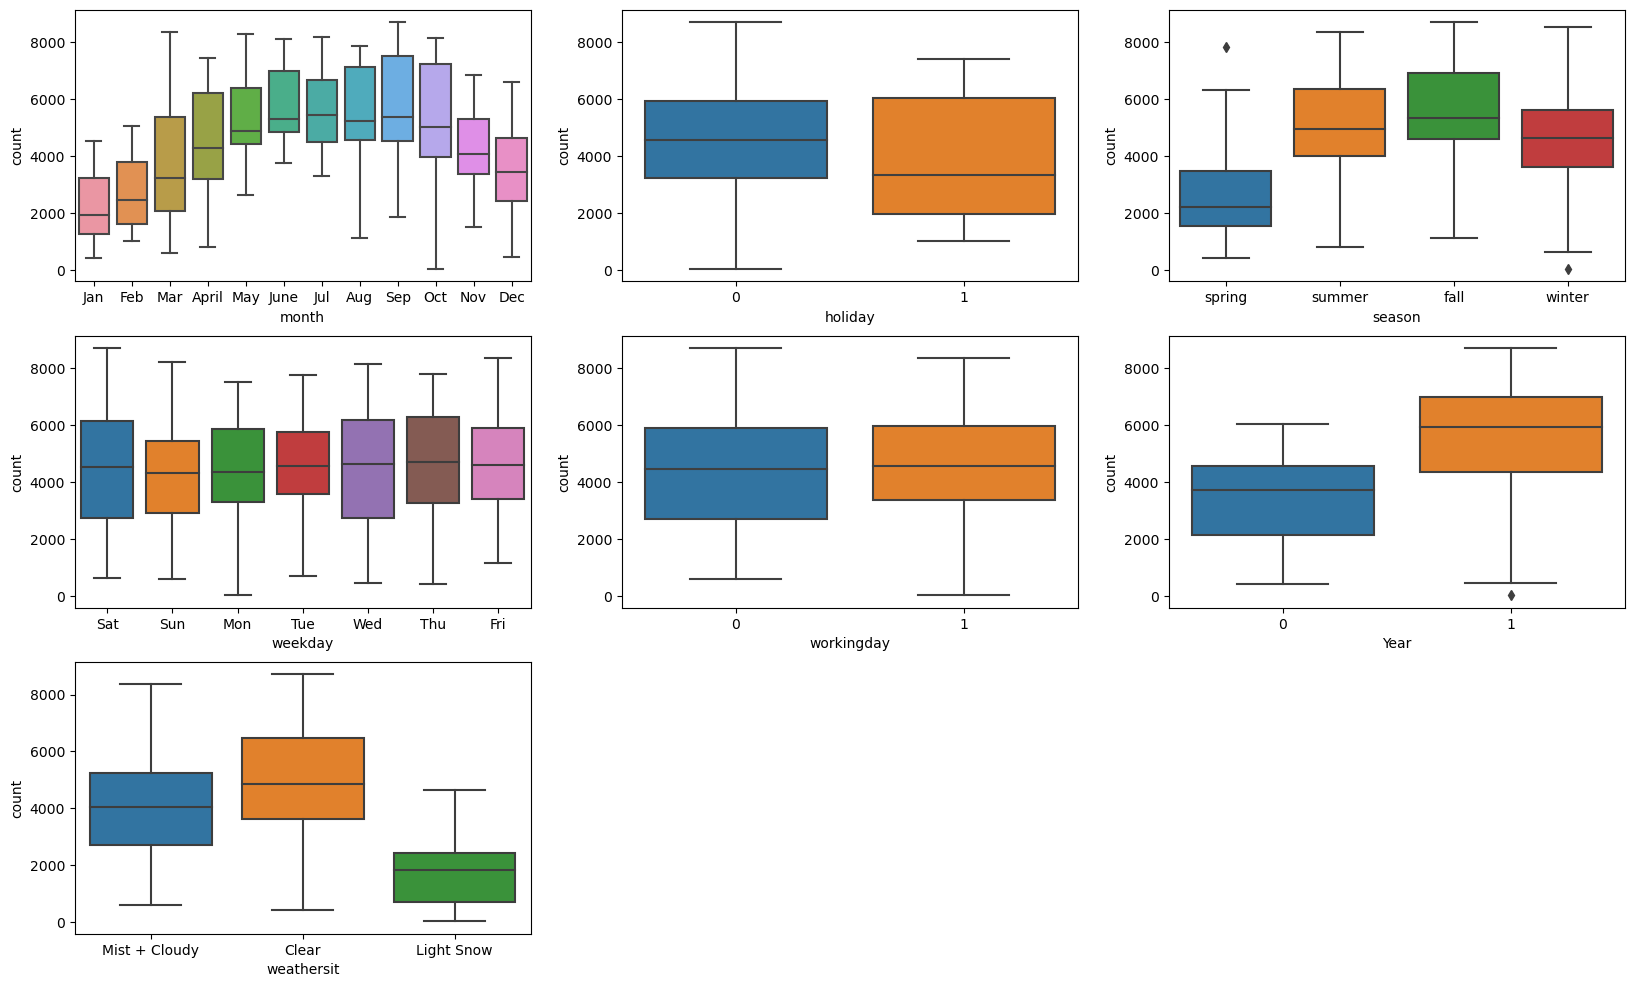

In [45]:
#Step 2: Data Visualisation 

#Pairplot for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
#sns.boxplot(x = 'season', y = 'count', data = bike)
#plt.subplot(2,4,7)

plt.show()

Interpritation of relation between categorical variable and target
        Bike Rentals are more in clear weather situation
        Bike Rentals are more in current year than the privious year
        Bike Rentals are maximum in fall season
        Bike Rentals are more on Saturday,wednesday and thursday

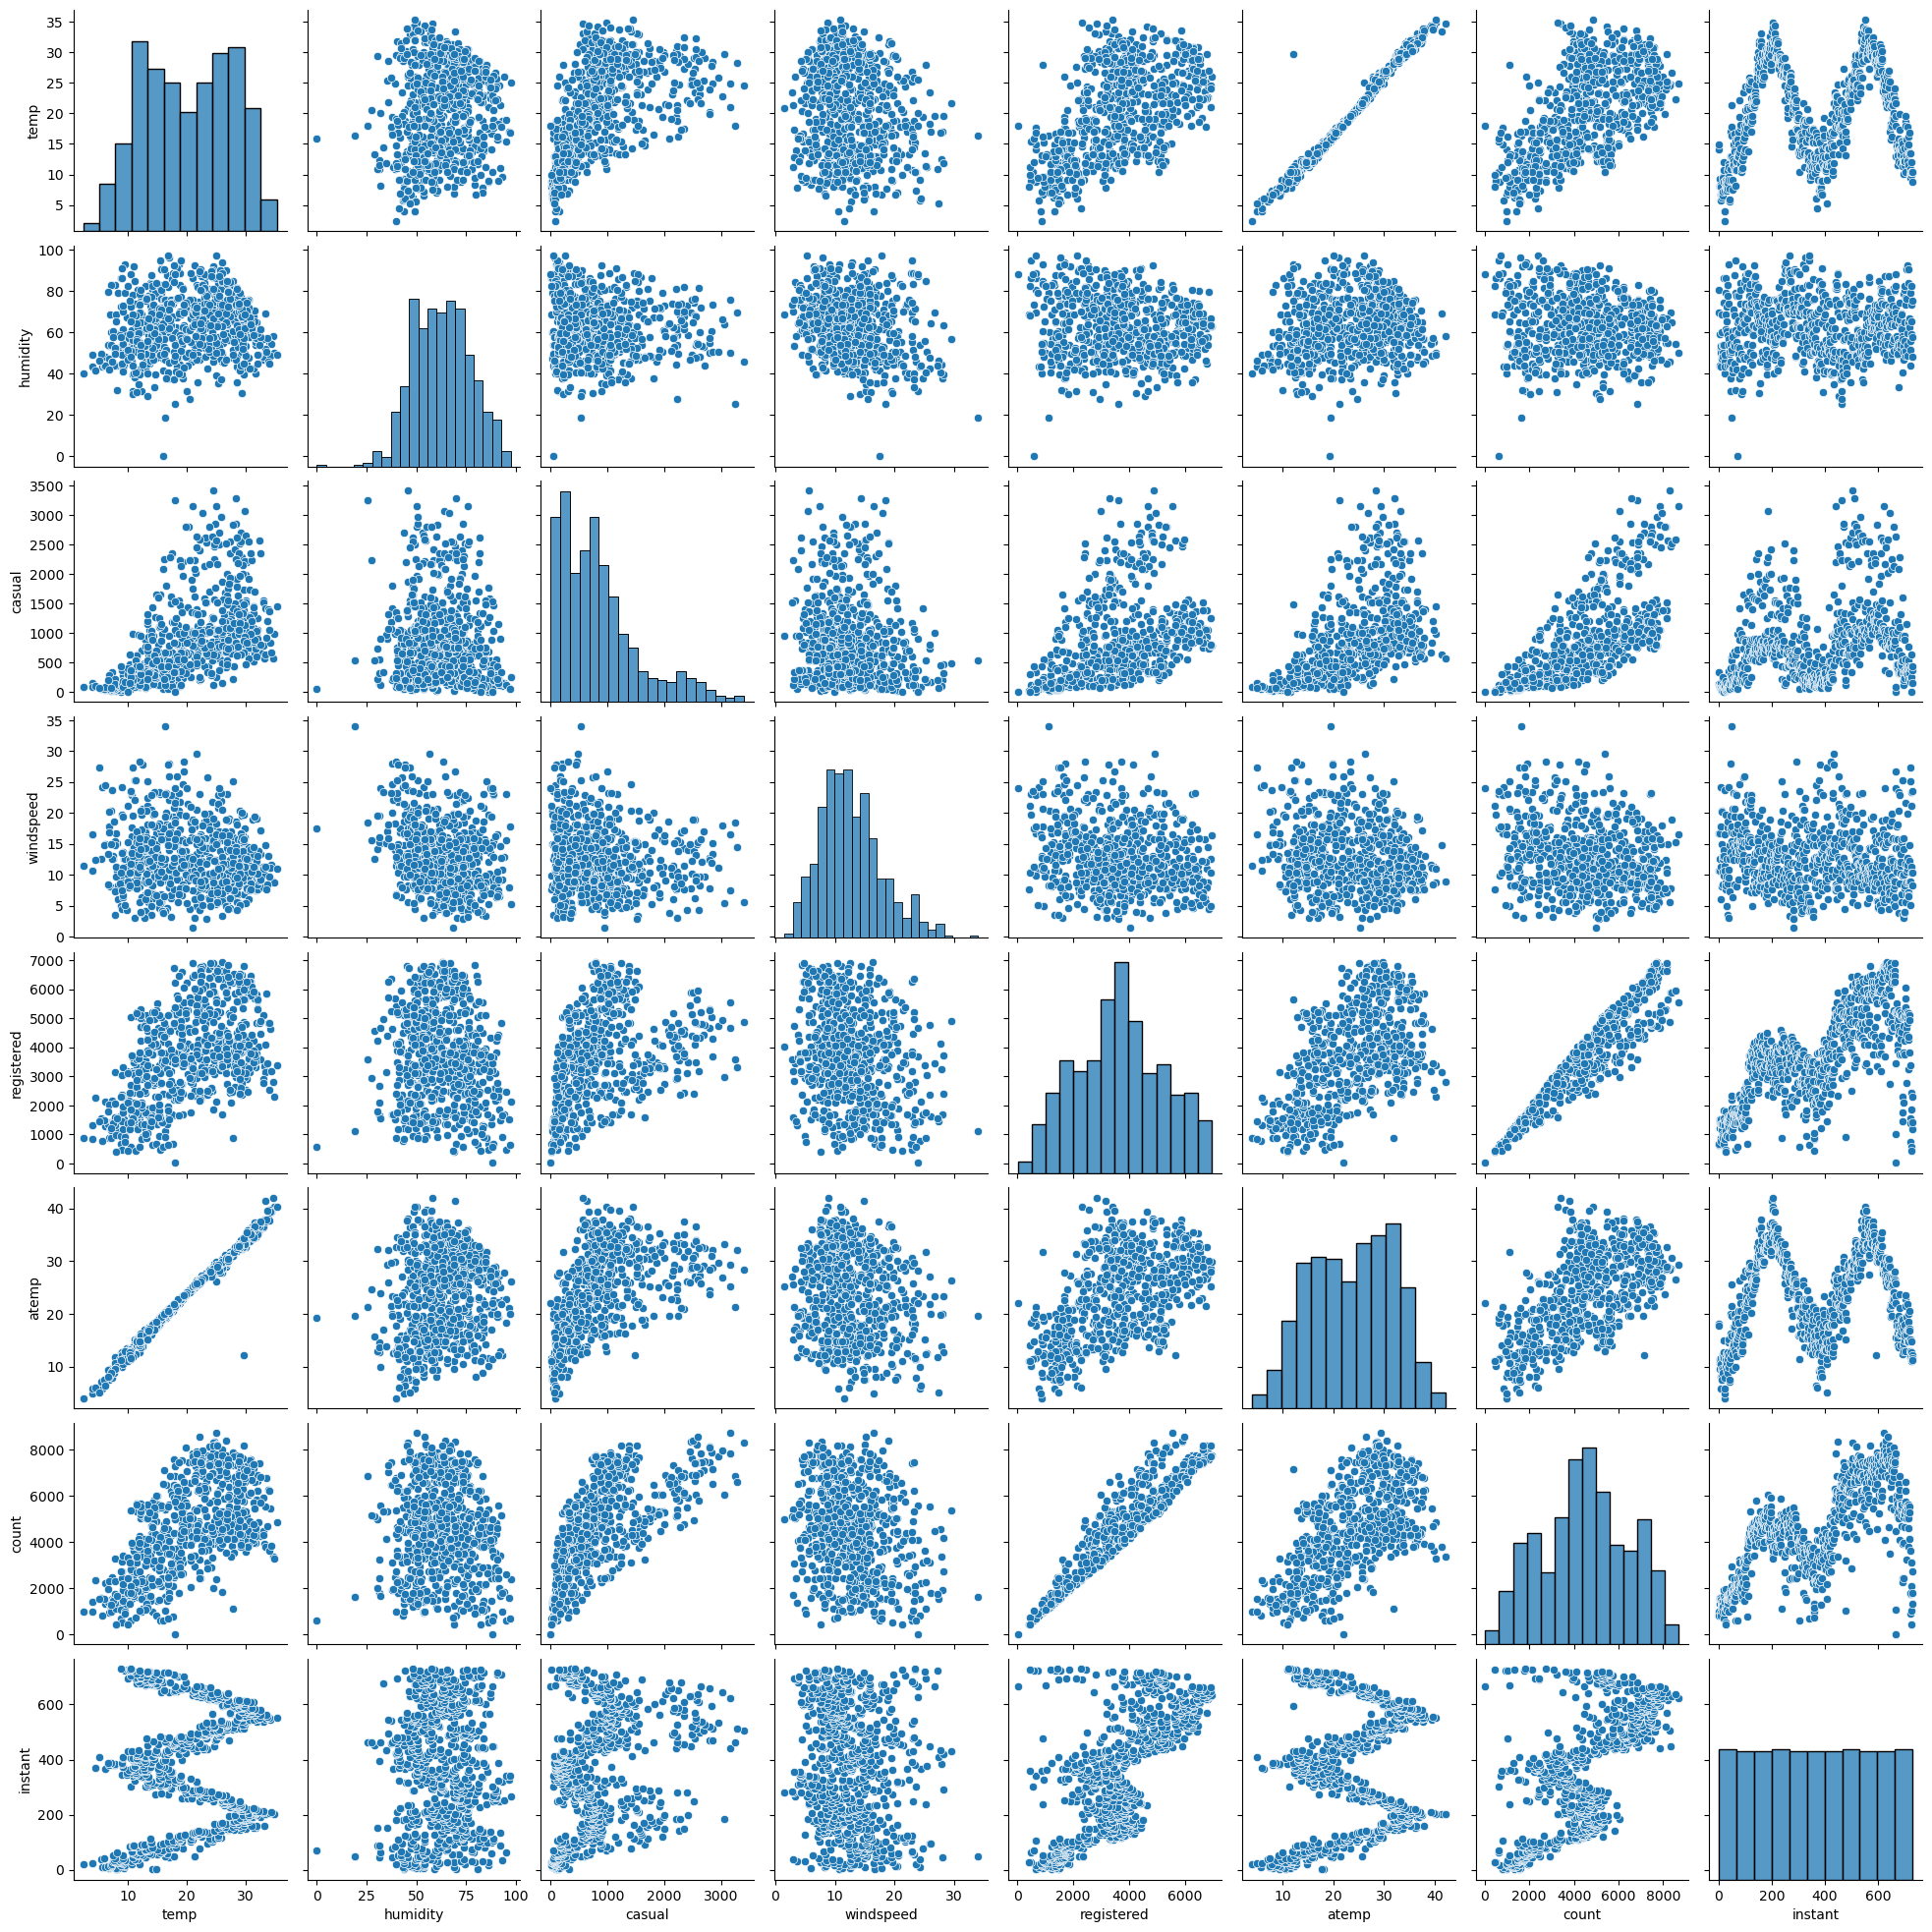

In [16]:
#Pairplot for numeric variables

sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

Text(0.5, 1.0, 'season vs Rental Count')

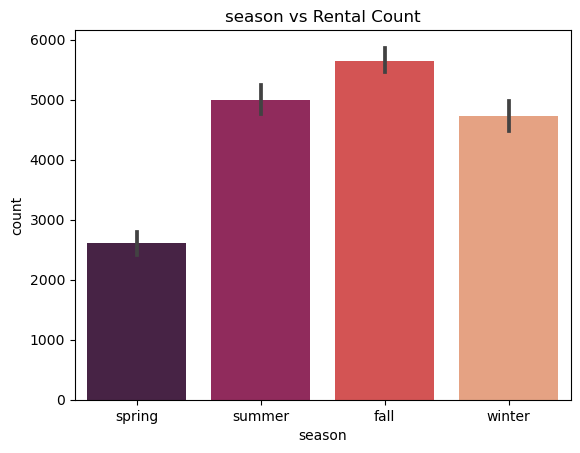

In [24]:
#Barplot to see relation between season and count of bike rentals

sns.barplot(x="season", y="count", data=bike,palette="rocket")
plt.title('season vs Rental Count')

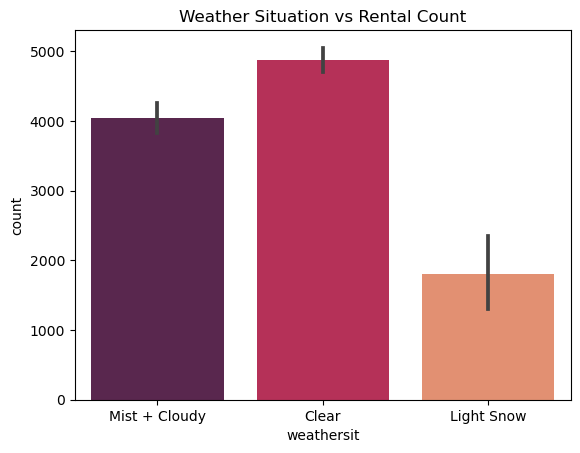

In [25]:
#Relation between weather and count of bike rentals
sns.barplot(x="weathersit",y="count",palette="rocket",data=bike)
plt.title('Weather Situation vs Rental Count')
plt.show()

Observation : Rent count is more on clear weather than light snow

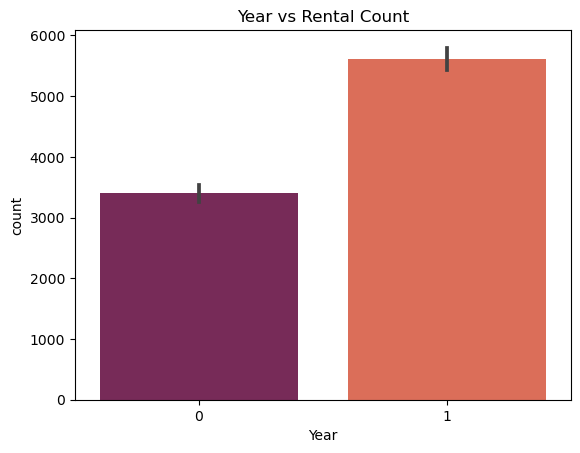

In [26]:
#Relation between Year and count of bike rentals
sns.barplot(x='Year',y='count',data=bike,palette="rocket")
plt.title('Year vs Rental Count')
plt.show()

observation : Rental Count is more in current year than the privious year

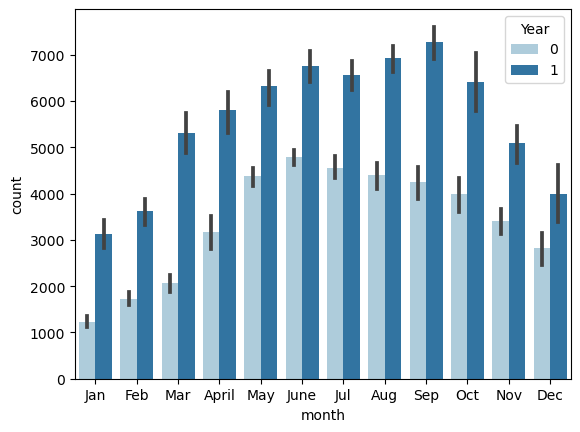

In [18]:
sns.barplot(x='month', y='count', hue='Year', data=bike,palette="Paired")

plt.show()

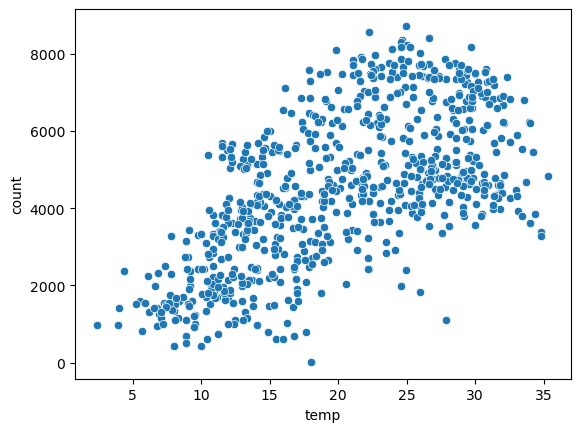

In [28]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()


observation : Bike Rentals are observed at higher temperatures¶

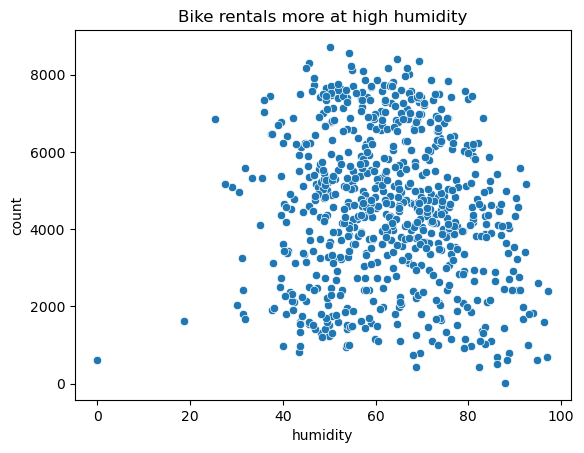

In [34]:
sns.scatterplot(x='humidity', y='count',data=bike)

plt.title("Bike rentals more at high humidity")
plt.show()

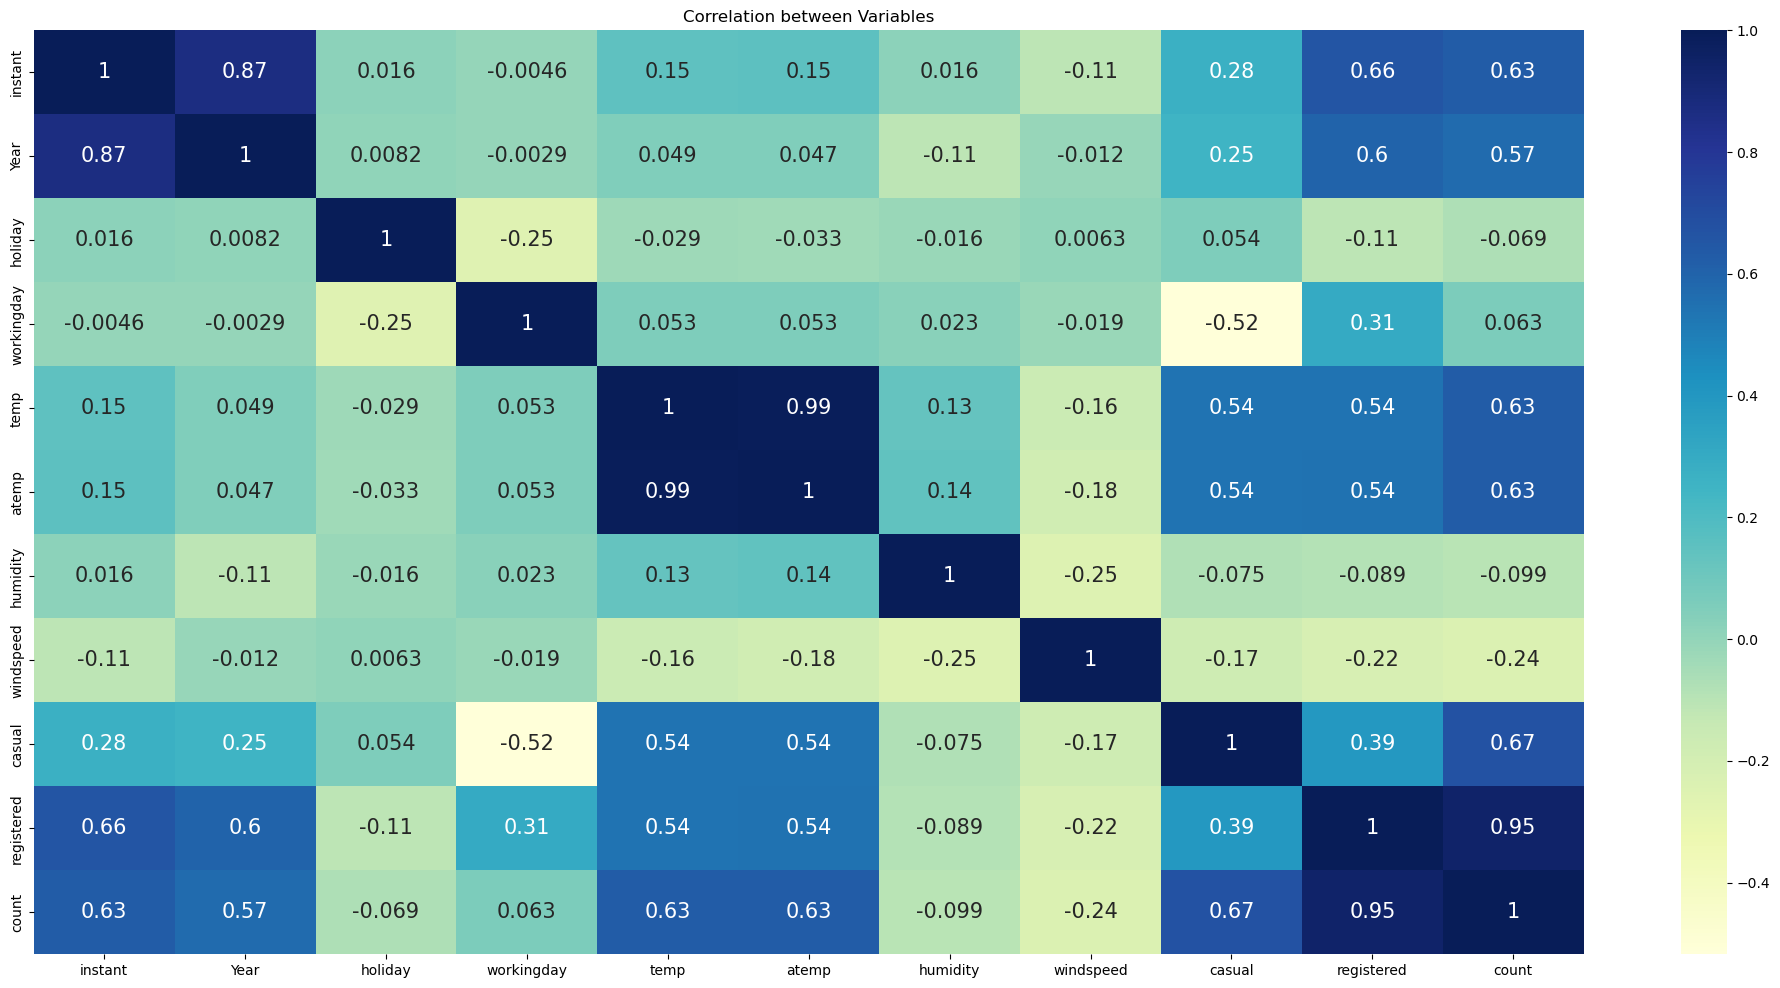

In [35]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True,annot_kws={'size':15})
plt.title("Correlation between Variables")
plt.show()

In [46]:
#drop columns which are redundent

bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


<Axes: xlabel='count', ylabel='Density'>

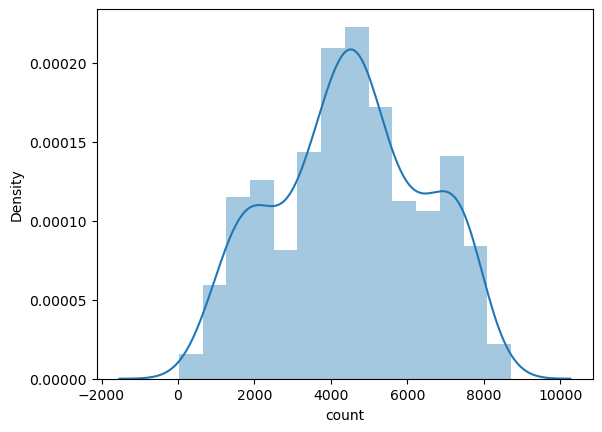

In [37]:
#population plot:

sns.distplot(bike['count'])

observation:
Target Variable shows almost normal distribution

In [47]:
#Checking DataType
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [48]:
bike.shape

(730, 11)

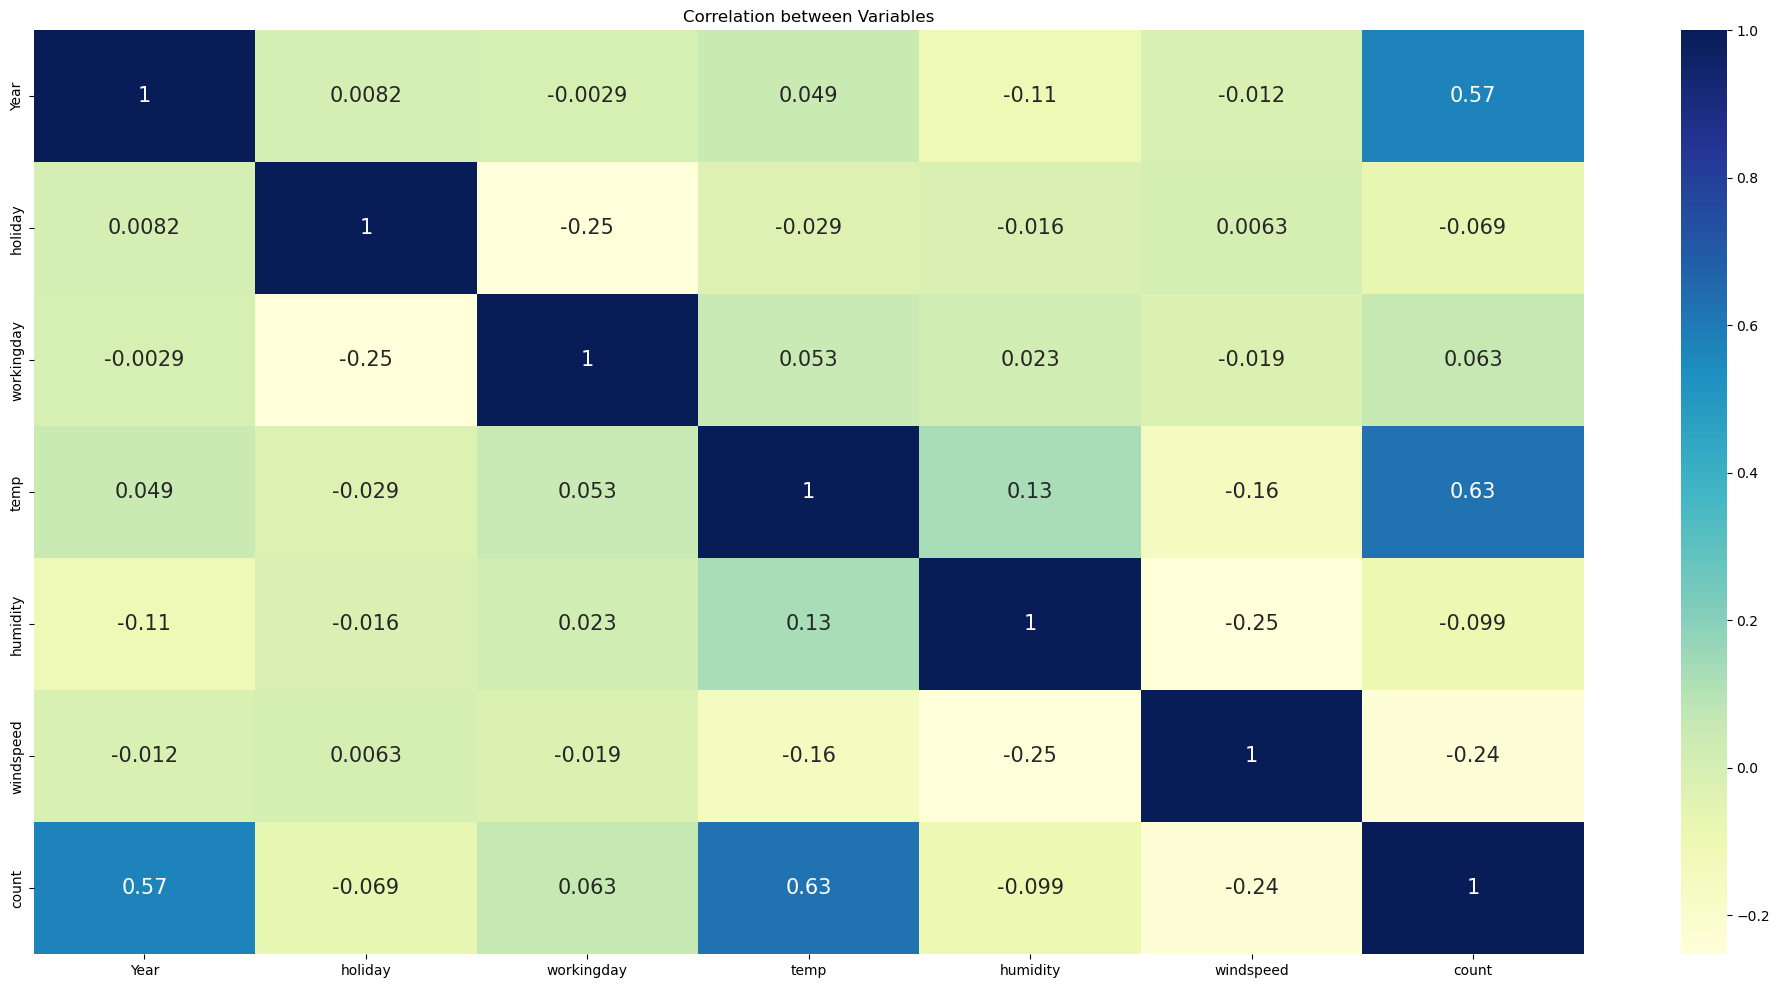

In [40]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True,annot_kws={'size':15})
plt.title("Correlation between Variables")
plt.show()

In [49]:
bike.head(5)

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# Data Preparation

In [ ]:
Get Dummy Variables 

In [50]:
#Checking DataType
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [51]:
Seasons = pd.get_dummies(bike['season'])
Seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [52]:
Seasons = pd.get_dummies(bike['season'],drop_first=True)
Seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [53]:
months = pd.get_dummies(bike['month'])
months.head()

,April,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
months=pd.get_dummies(bike.month,drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [55]:
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weekdays.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [56]:
weathersits = pd.get_dummies(bike['weathersit'])
weathersits.head()

,Clear,Light Snow,Mist + Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [57]:
weathersits=pd.get_dummies(bike.weathersit,drop_first=True)
weathersits.head()

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Concatination of months,weekdays,weathersits,Seasons,bike


In [59]:
bike=pd.concat([months,weekdays,weathersits,Seasons,bike],axis=1)


In [62]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            730 non-null    uint8  
 1   Dec            730 non-null    uint8  
 2   Feb            730 non-null    uint8  
 3   Jan            730 non-null    uint8  
 4   Jul            730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   Mar            730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   Nov            730 non-null    uint8  
 9   Oct            730 non-null    uint8  
 10  Sep            730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

In [63]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [65]:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'Year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [66]:
bike.shape

(730, 29)

# Splitting the Data into Training and Testing Sets

In [67]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [68]:


# We specify this so that the train and test data set always have the same rows, respectively

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


 # ReScaling

In [70]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'humidity', 'count','windspeed']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train[num_vars].head()

,temp,humidity,count,windspeed
653,0.509887,0.575354,0.864243,0.300794
576,0.815169,0.725633,0.827658,0.264686
426,0.442393,0.640189,0.465255,0.255342
728,0.245101,0.498067,0.204096,0.663106
482,0.395666,0.504508,0.482973,0.188475


In [71]:
bike_train[num_vars].describe()

,temp,humidity,count,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.513620,0.320768
std,0.225844,0.145882,0.224593,0.169797
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.356420,0.199179
50%,0.540519,0.653714,0.518638,0.296763
75%,0.735215,0.754830,0.684710,0.414447
max,1.000000,1.000000,1.000000,1.000000


# Training the model 

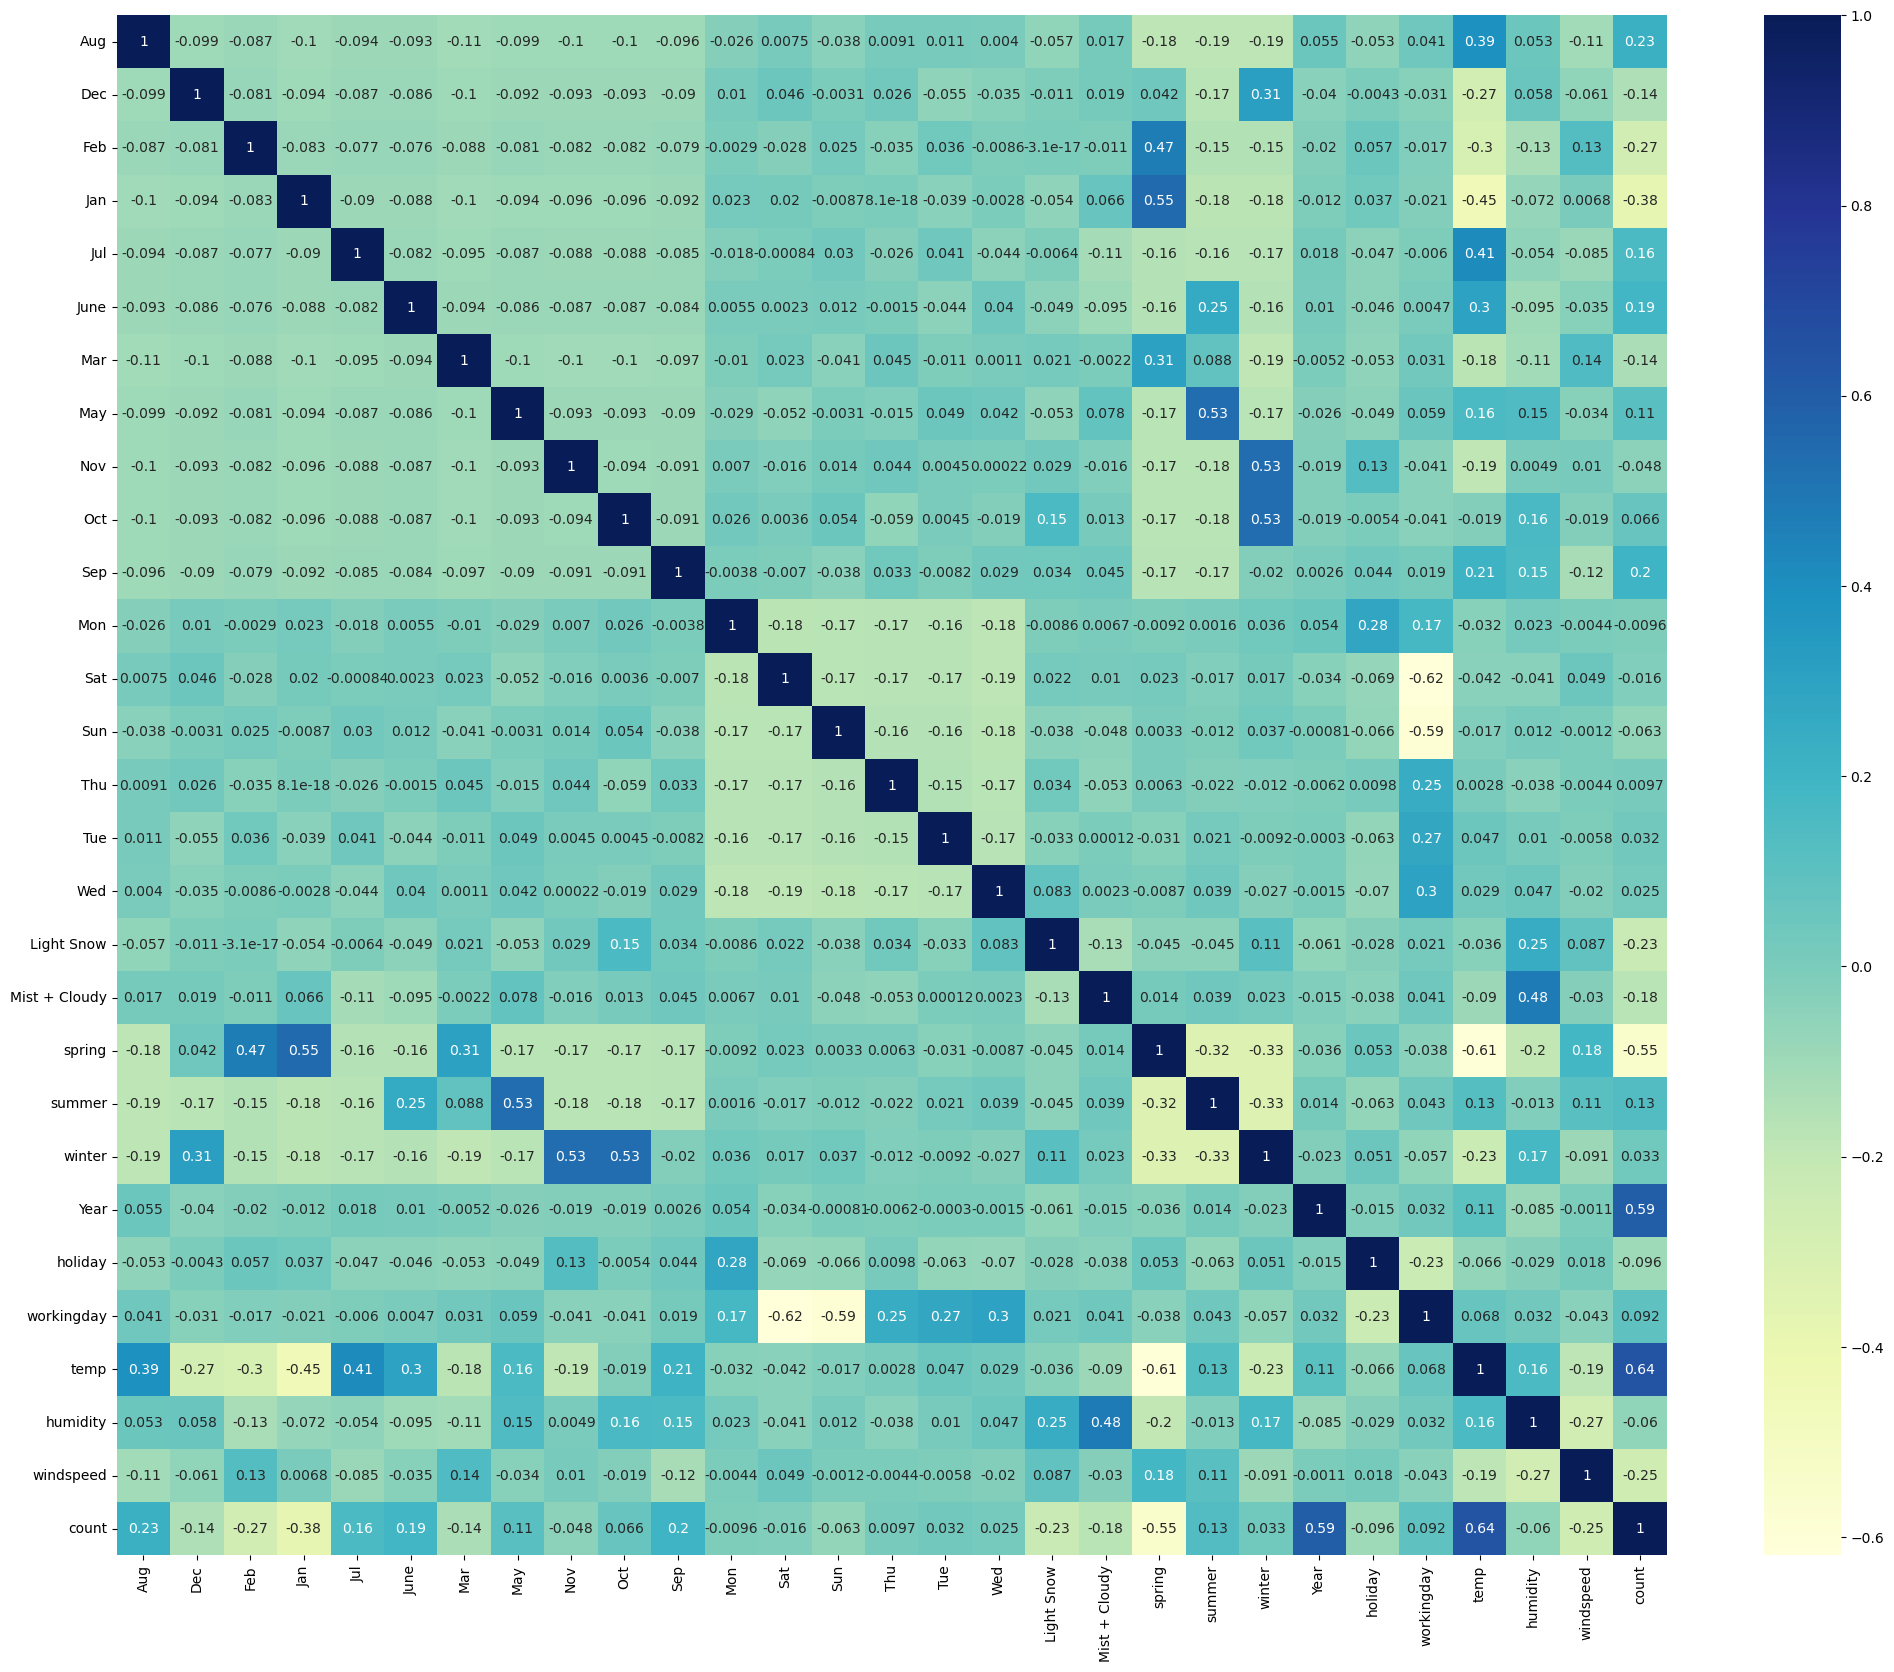

In [72]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [73]:
#Dividing X and Y sets for model building
X_train=bike_train

y_train =bike_train.pop('count')

In [74]:
X_train.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.504508,0.188475


In [75]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [80]:
import statsmodels.api as sm

In [81]:
x_train_sm=sm.add_constant(X_train)

# Create  model

lr=sm.OLS(y_train,x_train_sm)

# fit a model
lr_model= lr.fit()

#check for parameters
#lr_model.params

#check summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          8.74e-182
Time:                        13:07:13   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
Jul              -0.0404      0.035     -1.151      0.250      -0.109       0.029
June             -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
May               0.0239      0.021      1.140      0.255      -0.017       0.065
Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
Sep               0.0811      0.032      2.533      0.012       0.018       0.144
Mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat               0.0964      0.014      7.029      0.000       0.069       0.123
Sun               0.0419      0.014      3.006      0.003       0.014       0.069
Thu              -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue              -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed              -0.0054      0.015     -0.362      0.718      -0.035       0.024
Light Snow       -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist + Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
spring           -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer            0.0387      0.026      1.478      0.140      -0.013       0.090
winter            0.1058      0.028      3.794      0.000       0.051       0.161
Year              0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
humidity         -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     8.40e+15
================================================================

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()


vif['Features'] = X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [84]:
vif

,Features,VIF
24,workingday,85.58
12,Sat,19.72
13,Sun,18.35
19,spring,10.79
21,winter,9.50
20,summer,8.29
25,temp,7.12
8,Nov,6.80
9,Oct,6.59
0,Aug,6.43


# Building our model with RFE(Recursive feature elimination)

In [76]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [90]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=13)             # running RFE with 15 variable
rfe = rfe.fit(X_train, y_train)

#rfe = RFE(lm, 15)             # running RFE
#rfe = rfe.fit(X_train, y_train)

In [91]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 10),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('June', False, 16),
 ('Mar', False, 13),
 ('May', False, 14),
 ('Nov', False, 5),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', False, 2),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [92]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jul', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [93]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'summer', 'winter'],
      dtype='object')

In [94]:
vif

,Features,VIF
24,workingday,85.58
12,Sat,19.72
13,Sun,18.35
19,spring,10.79
21,winter,9.50
20,summer,8.29
25,temp,7.12
8,Nov,6.80
9,Oct,6.59
0,Aug,6.43


Building model using statsmodel, for the detailed statistics

In [95]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [96]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [97]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [98]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.27e-186
Time:                        16:09:06   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2831      0.024     11.725

In [99]:
#Drop the holiday column 
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.61
9,workingday,9.03
3,Sat,6.04
4,Sun,5.72
10,temp,2.09
11,humidity,1.83
7,spring,1.64
6,Mist + Cloudy,1.54
1,Jul,1.30
5,Light Snow,1.25


In [101]:
#Drop the holiday column 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [102]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,24.20
8,workingday,16.43
9,temp,13.02
11,windspeed,4.50
2,Sat,4.42
3,Sun,4.33
5,Mist + Cloudy,2.18
7,Year,2.06
6,spring,1.97
0,Jul,1.40


In [103]:
#Drop humidity
X_train_new1 = X_train_rfe.drop(["humidity"], axis = 1)

In [104]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          7.44e-186
Time:                        16:13:39   Log-Likelihood:                 495.64
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     498   BIC:                            -916.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2187      0.031      7.039

In [105]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.35
9,workingday,9.03
3,Sat,6.04
4,Sun,5.72
10,temp,2.03
7,spring,1.64
1,Jul,1.28
2,Sep,1.11
11,windspeed,1.07
5,Light Snow,1.05


In [107]:
X_train_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          510 non-null    float64
 1   Jul            510 non-null    uint8  
 2   Sep            510 non-null    uint8  
 3   Sat            510 non-null    uint8  
 4   Sun            510 non-null    uint8  
 5   Light Snow     510 non-null    uint8  
 6   Mist + Cloudy  510 non-null    uint8  
 7   spring         510 non-null    uint8  
 8   Year           510 non-null    int64  
 9   workingday     510 non-null    int64  
 10  temp           510 non-null    float64
 11  windspeed      510 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 27.4 KB


In [108]:
#Drop the constant term B0
X_train_lm2 = X_train_lm1.drop(['const'], axis=1)

In [109]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,10.80
8,workingday,10.39
10,windspeed,4.47
2,Sat,3.09
3,Sun,2.87
7,Year,2.06
6,spring,1.91
5,Mist + Cloudy,1.57
0,Jul,1.36
1,Sep,1.20


In [111]:
#Build a new model
X_train_new_lm2  = sm.add_constant(X_train_lm2)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          7.44e-186
Time:                        16:22:18   Log-Likelihood:                 495.64
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     498   BIC:                            -916.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2187      0.031      7.039

In [112]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.35
9,workingday,9.03
3,Sat,6.04
4,Sun,5.72
10,temp,2.03
7,spring,1.64
1,Jul,1.28
2,Sep,1.11
11,windspeed,1.07
5,Light Snow,1.05


In [113]:
#Drop constant 
X_train_new_lm2=X_train_new_lm2.drop(['const'],axis=1)

In [114]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,10.80
8,workingday,10.39
10,windspeed,4.47
2,Sat,3.09
3,Sun,2.87
7,Year,2.06
6,spring,1.91
5,Mist + Cloudy,1.57
0,Jul,1.36
1,Sep,1.20


In [115]:
# Drop Windspeed
X_train_new3= X_train_new_lm2.drop(['windspeed'], axis=1)

In [118]:
#Build a model
X_train_lm3=sm.add_constant(X_train_new3)
lm3=sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          3.30e-179
Time:                        16:32:28   Log-Likelihood:                 477.09
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     499   BIC:                            -885.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1641      0.031      5.321

In [119]:
#Drop constant
X_train_lm3= X_train_lm3.drop(['const'], axis=1)

In [121]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,10.73
8,workingday,9.00
2,Sat,2.71
3,Sun,2.56
7,Year,2.06
6,spring,1.83
5,Mist + Cloudy,1.57
0,Jul,1.35
1,Sep,1.19
4,Light Snow,1.06


In [124]:
X_train_lm3.head()

,Jul,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,Year,workingday,temp
653,0,0,0,0,0,0,0,1,1,0.509887
576,1,0,0,0,0,0,0,1,1,0.815169
426,0,0,1,0,0,1,1,1,0,0.442393
728,0,0,0,1,0,0,1,1,0,0.245101
482,0,0,1,0,0,1,0,1,0,0.395666


In [126]:
# Drop saturday
X_train_new4= X_train_lm3.drop(['Sat'], axis=1)

In [127]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.1
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          2.14e-177
Time:                        16:38:49   Log-Likelihood:                 469.96
No. Observations:                 510   AIC:                            -919.9
Df Residuals:                     500   BIC:                            -877.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2555      0.019     13.271

In [128]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.98
9,temp,2.02
6,spring,1.62
8,workingday,1.55
3,Sun,1.54
1,Jul,1.28
2,Sep,1.09
5,Mist + Cloudy,1.04
4,Light Snow,1.03
7,Year,1.02


In [129]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [130]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.37
7,workingday,3.96
6,Year,2.03
2,Sun,1.58
4,Mist + Cloudy,1.49
5,spring,1.36
0,Jul,1.31
1,Sep,1.18
3,Light Snow,1.04


In [131]:
 # Drop Sunday
X_train_new5= X_train_lm4.drop(['Sun'], axis=1)

In [143]:
#Build a model
X_train_lm5=sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          2.73e-177
Time:                        23:22:20   Log-Likelihood:                 466.81
No. Observations:                 510   AIC:                            -915.6
Df Residuals:                     501   BIC:                            -877.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2386      0.018     13.171

In [133]:
#Drop constant
X_train_lm5= X_train_lm5.drop(['const'], axis=1)

In [134]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,4.17
6,workingday,2.88
5,Year,2.02
3,Mist + Cloudy,1.49
0,Jul,1.31
4,spring,1.27
1,Sep,1.18
2,Light Snow,1.04


 Now we have our model
 
    --> The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
    
    -->  The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model.
    
    --> The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

    --> A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression
    
    --> R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.814 or 81.4%
    
    --> The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.811 or 81%

## Residual Analysis of the train data

In order to check if the error terms are also normally distributed, we will plot the histogram of the error terms

In [144]:
X_train_lm5=sm.add_constant(X_train_lm5)
X_train_lm5.columns
X_train_lm5

,const,Jul,Sep,Light Snow,Mist + Cloudy,spring,Year,workingday,temp
653,1.0,0,0,0,0,0,1,1,0.509887
576,1.0,1,0,0,0,0,1,1,0.815169
426,1.0,0,0,0,1,1,1,0,0.442393
728,1.0,0,0,0,0,1,1,0,0.245101
482,1.0,0,0,0,1,0,1,0,0.395666
...,...,...,...,...,...,...,...,...,...
526,1.0,0,0,0,1,0,1,1,0.824514
578,1.0,0,0,0,0,0,1,1,0.863973
53,1.0,0,0,0,0,1,0,1,0.202618
350,1.0,0,0,0,1,0,0,0,0.248216


In [145]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [146]:
y_train_pred

653    0.698579
576    0.753385
426    0.416002
728    0.417245
482    0.550567
         ...   
526    0.744124
578    0.839774
53     0.188740
350    0.257655
79     0.365718
Length: 510, dtype: float64

In [148]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns


<Figure size 640x480 with 0 Axes>

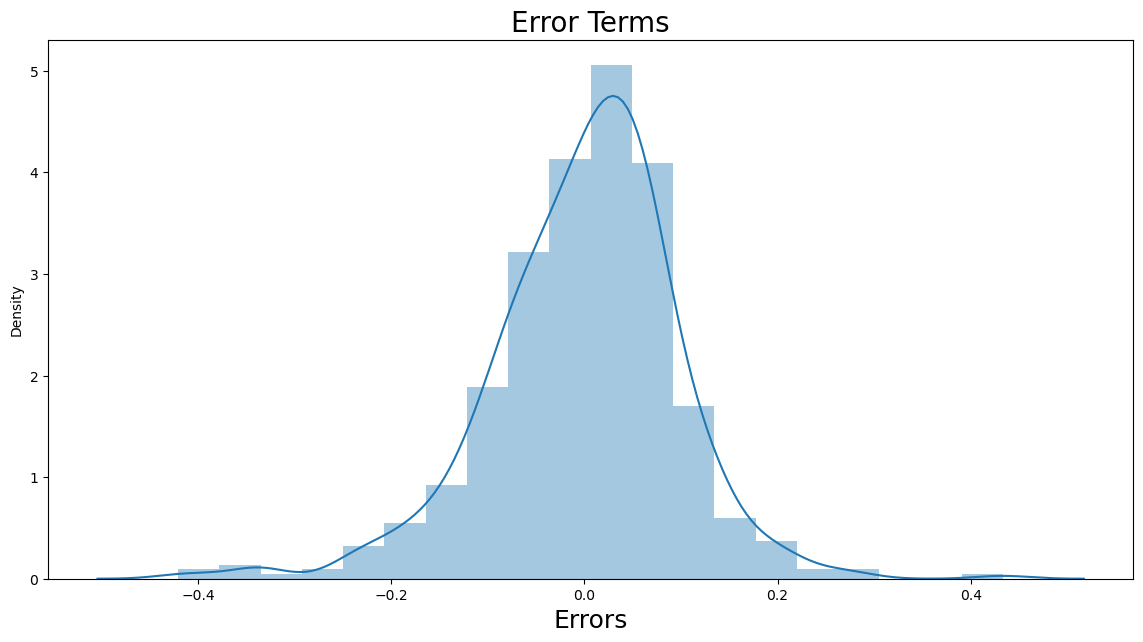

In [149]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see Error terms are normally distributed

# Making Prediction 

Applying Scaling on test set

In [152]:
#Create a list of numeric variables
num_vars=['temp', 'humidity', 'count','windspeed']


In [153]:
#Tranform on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [154]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.319635,0.255708,0.264840,0.232877,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.467403,0.437258,0.442259,0.423633,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [155]:
#Columns
X_train_lm5.columns

Index(['const', 'Jul', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'Year',
       'workingday', 'temp'],
      dtype='object')

In [156]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Jul,Sep,Light Snow,Mist + Cloudy,spring,Year,workingday,temp
184,1.0,1,0,0,1,0,0,0,0.831783
535,1.0,0,0,0,0,0,1,1,0.901354
299,1.0,0,0,0,1,0,0,1,0.511964
221,1.0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,0,1,0.817246


In [157]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [158]:
y_pred

184    0.423430
535    0.854680
299    0.385377
221    0.612698
152    0.587026
         ...   
400    0.342299
702    0.702305
127    0.471726
640    0.712656
72     0.240156
Length: 219, dtype: float64

Finding R-squared and Adjusted R-Squared for Test set

In [160]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8043798880268116

In [164]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8043798880268116)*(9-1)/(9-1-1)
print(Adj_r2)

0.7764341577449275


# Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

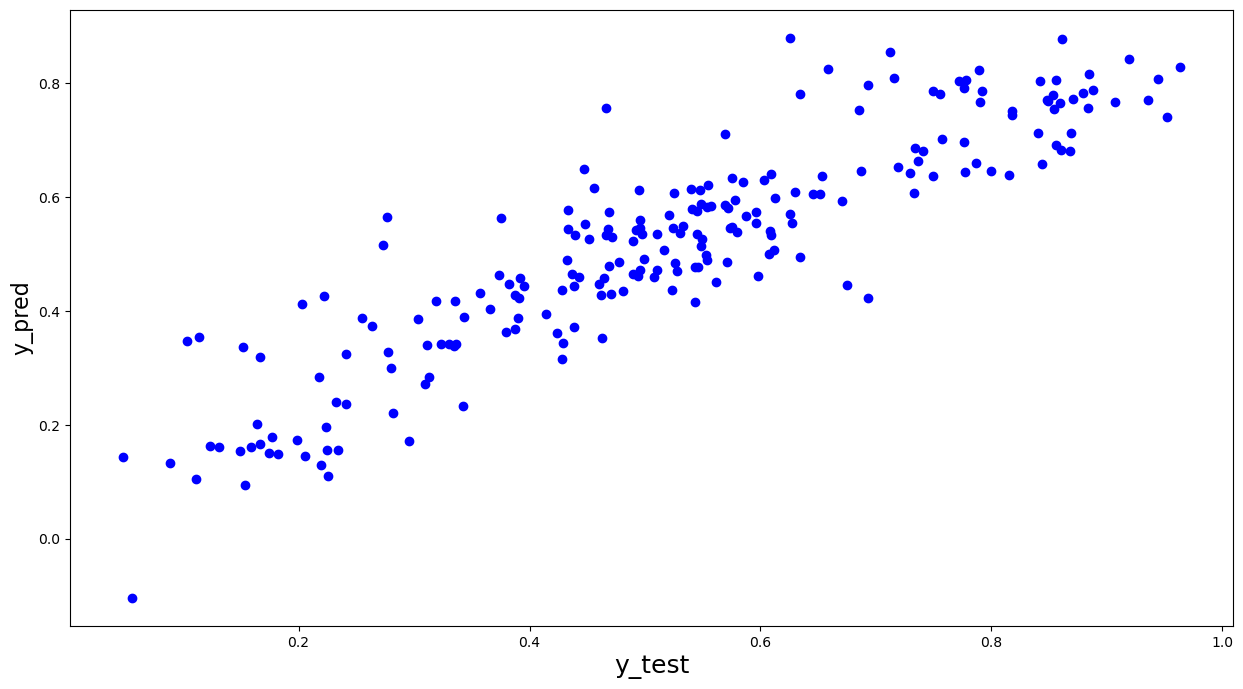

In [165]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

Now we will visualise the the regression line on test set

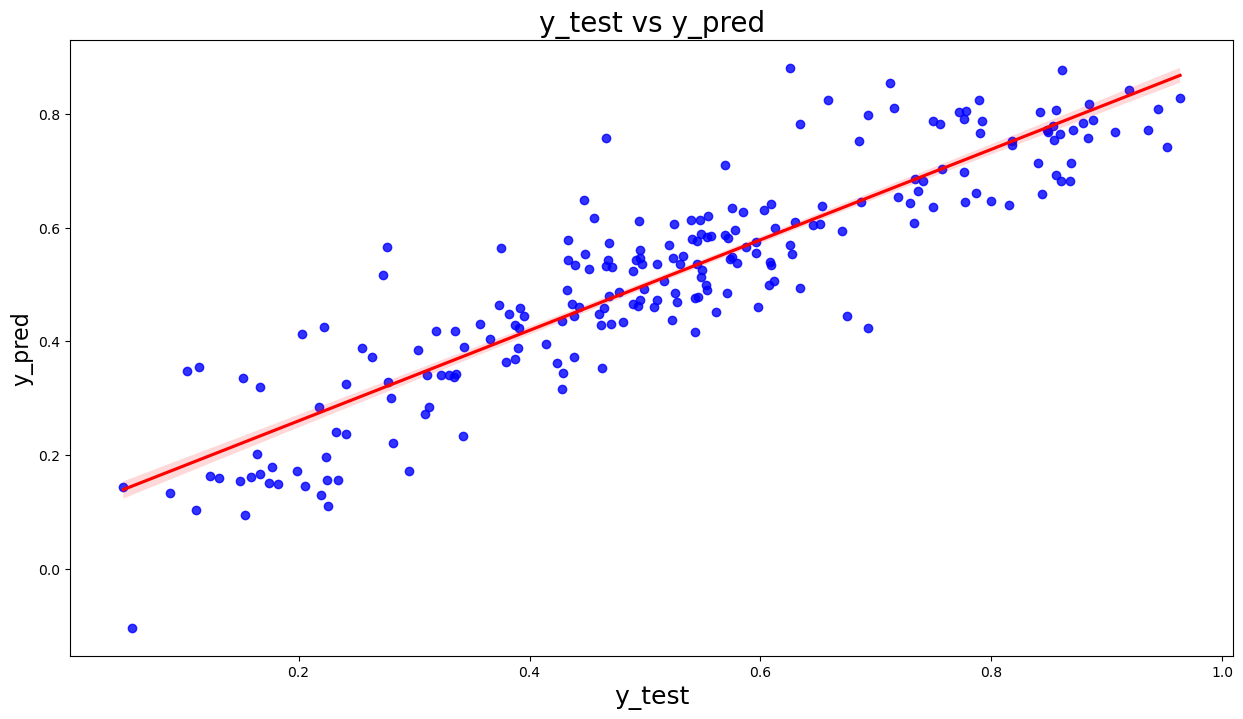

In [166]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Final Result Comparison between Train model and Test:
- Train R^2 : 0.814 or 81.4%
- Train Adjusted R^2 : 0.811 or 81%
- Test R^2: 0.804 or 80.4%
- Test Adjusted R^2: 0.776 or 77.6%
- Difference in R^2 between train and test: 1%
- Difference in adjusted R^2 between Train and test: 3.4% which is less than 5%
we have obtained  one of the best model


Interpretation from above : 
    
    - we have identified key independent variables 
    
    - we can see from above that , temperature has the higest coeffectient i.e 0.3988 , which means which means
    if the temperature increases by one unit the number of bike rentals increases by 0.3988 units.
    
    - negative coefficients, A negative coefficient suggests that as the independent variable increases, 
    the dependent variable tends to decrease. 


# Assignment-based Subjective Questions

1. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
    - Temp, Year(current year rental is better than previous year) and months of july and september
    
    
2. How did you validate the assumptions of Linear Regression after building the model on the training set?
   - By compairing the values of adjusted r2 and r2 of  prediction on test and train set.
  
3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
   - By analysing the pair plots of numerical variable , we can see that there are some independent variables which look positively correlated to the 'count' variable. Eg: Bike rentals are more correlated to temperature.
  
4. Why is it important to use drop_first=True during dummy variable creation? 
    
    - It helps in reducing the extra column created during dummy variable creation and hence reduces the correlations created among dummy variables.
  
5. From your analysis of the categorical variables from the dataset, what could you infer abouttheir effect on the dependent variable? 
   
   - The plots above shows the relationship between categorical variables and a Target variable.

    Bike Rentals are more during the Fall season and then in summer
    Bike Rentals are more in the year 2019 compared to 2018
    Bike Rentals are more in partly cloudy weather
    Bike Rentals are more on Saturday,wednesday and thursday

# General Subjective Questions

1. Explain the linear regression algorithm in detail
2. Explain the Anscombe’s quartet in detail. 
3. What is Pearson’s R? 
4. What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling?
5. You might have observed that sometimes the value of VIF is infinite. Why does this happen?
6. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.